In [ ]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving X_TRAIN.csv to X_TRAIN.csv


In [ ]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

In [ ]:

df = pd.read_csv(io.StringIO(uploaded['X_TRAIN.csv'].decode('utf-8')))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Y_TRAIN.csv to Y_TRAIN.csv


In [ ]:
df1 = pd.read_csv(io.StringIO(uploaded['Y_TRAIN.csv'].decode('utf-8')))

In [ ]:
df.shape

(366, 33)

In [ ]:
df1.shape

(366, 2)

In [ ]:
df1.head()

,StudentID,G3
0,1000,16
1,1008,11
2,1013,14
3,1014,7
4,1017,10


In [ ]:
df.head()

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,1000,GP,F,16,U,GT3,T,4,2,services,...,no,4,2,3,1,1,5,2,15,16
1,1008,GP,M,19,U,GT3,T,1,2,other,...,no,4,5,2,2,2,4,3,13,11
2,1013,GP,F,16,U,GT3,T,4,4,services,...,no,3,2,3,1,2,2,6,13,14
3,1014,GP,F,16,U,GT3,T,3,1,services,...,no,4,3,3,1,2,5,4,7,7
4,1017,GP,F,15,U,LE3,A,3,4,other,...,yes,5,3,2,1,1,1,0,10,11


In [ ]:
#union of data
join = (df, df1['G3'])
df3 = pd.concat(join, axis = True)
df3.head()

,StudentID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1000,GP,F,16,U,GT3,T,4,2,services,...,4,2,3,1,1,5,2,15,16,16
1,1008,GP,M,19,U,GT3,T,1,2,other,...,4,5,2,2,2,4,3,13,11,11
2,1013,GP,F,16,U,GT3,T,4,4,services,...,3,2,3,1,2,2,6,13,14,14
3,1014,GP,F,16,U,GT3,T,3,1,services,...,4,3,3,1,2,5,4,7,7,7
4,1017,GP,F,15,U,LE3,A,3,4,other,...,5,3,2,1,1,1,0,10,11,10


In [ ]:
#indexing student ID
df3 = df3.set_index('StudentID')
df3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
StudentID,,,,,,,,,,,,,,,,,,,,,
1000,GP,F,16,U,GT3,T,4,2,services,other,...,4,2,3,1,1,5,2,15,16,16
1008,GP,M,19,U,GT3,T,1,2,other,services,...,4,5,2,2,2,4,3,13,11,11
1013,GP,F,16,U,GT3,T,4,4,services,services,...,3,2,3,1,2,2,6,13,14,14
1014,GP,F,16,U,GT3,T,3,1,services,other,...,4,3,3,1,2,5,4,7,7,7
1017,GP,F,15,U,LE3,A,3,4,other,other,...,5,3,2,1,1,1,0,10,11,10


In [ ]:
df3.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,16.737705,2.595628,2.418033,1.554645,1.934426,0.270492,3.939891,3.142077,3.185792,1.519126,2.267760,3.581967,4.139344,11.226776,11.363388,10.893443
std,1.241762,1.108069,1.106693,0.722263,0.808222,0.641534,0.898519,1.010374,1.129148,0.941241,1.281865,1.413284,5.571427,3.129260,3.265708,3.656049
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.250000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,9.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.750000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.750000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,40.000000,19.000000,19.000000,18.000000


In [ ]:
#handling categorical data
df3 = pd.get_dummies(df3, drop_first = True)
df3.head()

,StudentID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,1000,16,4,2,1,2,0,4,2,3,...,1,0,0,1,0,0,1,1,1,0
1,1008,19,1,2,1,2,1,4,5,2,...,0,1,0,0,0,0,0,1,1,0
2,1013,16,4,4,1,3,0,3,2,3,...,1,0,0,1,1,1,1,1,1,0
3,1014,16,3,1,1,4,0,4,3,3,...,1,0,1,1,1,0,1,1,1,0
4,1017,15,3,4,1,2,0,5,3,2,...,1,0,1,0,0,1,1,1,1,1


In [ ]:
#split data 
X = df3.drop('G3', axis = 1)
y = df3['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(292, 41)
(292,)
(74, 41)
(74,)


In [ ]:
#Linear Regression
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

CPU times: user 7.64 ms, sys: 846 µs, total: 8.49 ms
Wall time: 6.6 ms


0.9343626950471633

In [ ]:
#Lasso Regression
lasso = Lasso(alpha = 0.5)
%time lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

CPU times: user 6.07 ms, sys: 3.14 ms, total: 9.21 ms
Wall time: 10.2 ms


0.9329977713244767

In [ ]:
#prediction
y_pred = lr.predict(X_test)
print(y_pred)

[13.36115689  4.60762034  9.80292247  6.89842388  7.55197625 -2.24196707
 13.55463346 14.52283786  9.01455632 17.67812754 12.15071694 10.61954538
  9.92100071 14.50113246  6.20637907 12.58467755 13.91510501 13.78518479
 11.44725377  9.44134247 15.10247693 10.81905231 17.22358867 14.04195394
  9.54989546 11.93302857 10.74043926 12.04594086 10.14951102 13.96187035
 12.29420748  7.40561514  2.45706584 16.73524395  8.5945622  13.67230293
  7.43371618  9.81576638  8.26015904  8.31567742  9.35124626 11.78295383
 10.56725644 16.75280337 10.02481866  5.59903107 10.3782949  10.71221653
 14.75445461  9.85098868 11.88435419 15.93912899 11.90546326 13.32962301
  5.35591574  9.38556826 12.5572302  10.90935165 12.60820714  3.66841749
 11.94292476 15.32766121 12.77959637 12.54970159 13.06239313 13.45964065
 13.34081943  9.41671242  9.94461069 10.31794876 13.90134709  8.28218882
  9.32558074 11.39080325]


In [ ]:
y_pred = lr.predict(X_test)
df3 = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
df3.head()

,Actual,Predict
StudentID,,
1316,12,13.361157
1745,6,4.607620
1136,10,9.802922
1062,8,6.898424
1240,7,7.551976


In [ ]:
#check MAE, MSE & RMSE
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred).round(2))
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred).round(2))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred).round(2)))

Mean Absolute Error :  0.7
Mean Squared Error :  0.85
Root Mean Squared Error :  0.8366600265340756


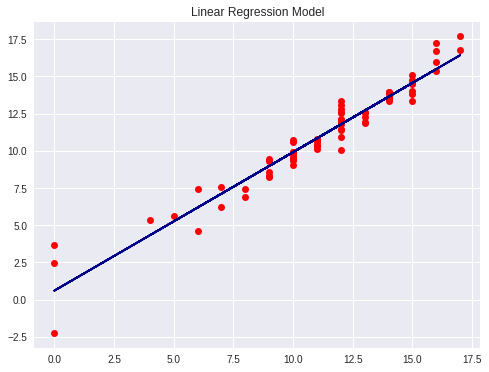

In [ ]:
#visualize model
x = y_test
y = y_pred

plt.figure(figsize = (8,6))
plt.title("Linear Regression Model")
plt.plot(x, y, 'o', color = 'r')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color = 'darkblue')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


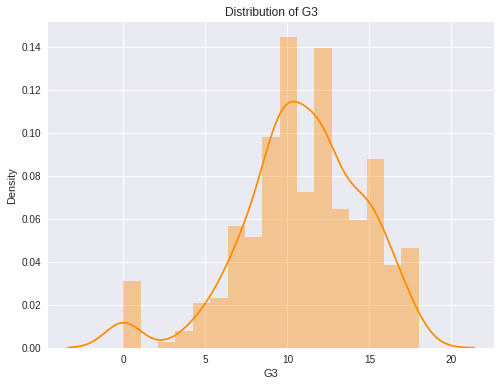

In [ ]:
#distribution
plt.figure(figsize = (8,6))
sns.distplot(df3['G3'], color = 'darkorange')
plt.title("Distribution of G3")
plt.show()

In [ ]:
#defining feature
coef = pd.Series(lr.coef_, index = X.columns)

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

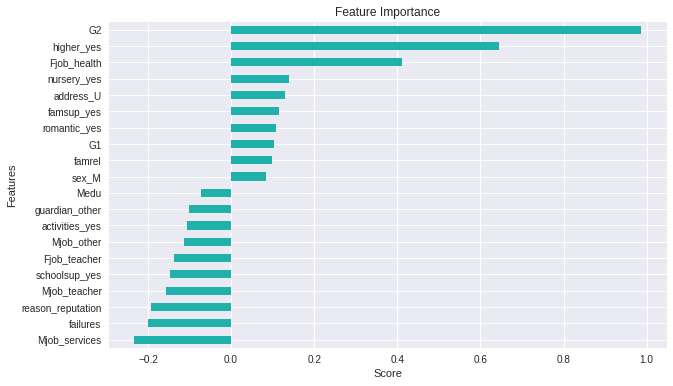

In [ ]:
#visualize feature
plt.figure(figsize = (10,6))
imp_coef.plot(kind = 'barh', color = 'lightseagreen')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()